<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Dimensionally_reduction_techniques/Dimensionally_reduction_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionally_reduction_techniques

Dimension -> feature, Columns



### **What is Dimensionality Reduction?**

In Machine Learning and Data Science, **dimensionality reduction** means reducing the number of input variables (features) in a dataset while keeping as much useful information as possible.

* High-dimensional data (many features) → harder to analyze, visualize, and train models on.
* Dimensionality reduction helps simplify the dataset, improve performance, and reduce noise.



### **Why is it needed?**

* To remove irrelevant/noisy features.
* To **avoid the "curse of dimensionality"** (performance issues when data has too many features).
* To **visualize data** in 2D or 3D.
* To **reduce computation cost** for ML algorithms.



### **Types of Dimensionality Reduction Techniques**

1. **Feature Selection (choose important features)**

   * Instead of reducing dimensions mathematically, we just **pick the best subset of features**.
   * Examples:

     * Filter methods (Correlation, Chi-square test, ANOVA)
     * Wrapper methods (Forward selection, Backward elimination)
     * Embedded methods (LASSO, Decision Trees feature importance)



2. **Feature Extraction (transform data into new dimensions)**

   * We create **new features** by combining or transforming original features.
   * Techniques:

   **a) Principal Component Analysis (PCA)**

   * Converts correlated features into fewer **uncorrelated principal components**.
   * Keeps maximum variance (information).
   * Widely used for compression & visualization.

   **b) Linear Discriminant Analysis (LDA)**

   * Supervised technique.
   * Reduces dimensions by maximizing class separability.
   * Used in classification tasks.

   **c) t-SNE (t-Distributed Stochastic Neighbor Embedding)**

   * Non-linear technique for **visualizing high-dimensional data in 2D/3D**.
   * Preserves local structure (good for clustering visualization).

   **d) Autoencoders (Deep Learning)**

   * Neural networks that learn compressed (lower-dimensional) representations.
   * Useful for very high-dimensional data like images.

   **e) UMAP (Uniform Manifold Approximation and Projection)**

   * Like t-SNE, but faster and preserves global + local structures better.



### **Quick Example**

Imagine you have a dataset of **100 features** describing patients’ health.

* Many features are correlated (e.g., weight, BMI, waist size).
* Instead of training an ML model on all 100 features, we can apply PCA → reduce it to maybe **10 principal components** that still capture **90–95% of the information**.




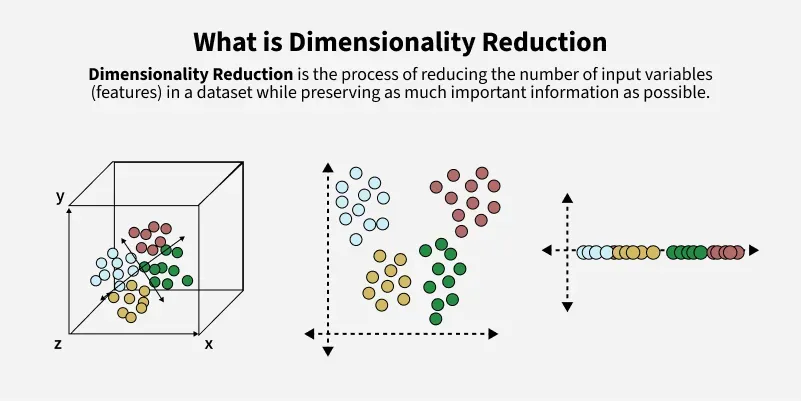



## **Principal Component Analysis (PCA)**
**In short:**
PCA = A way to reduce many correlated features into fewer uncorrelated features (principal components), keeping as much variance (information) as possible.

### **What is PCA?**

* PCA is a **dimensionality reduction technique**.
* It transforms high-dimensional data into a **smaller set of uncorrelated variables** called **principal components**.
* These components capture the **maximum variance (information)** from the original data.
* PCA is an Unsupervised learning technique.



### **Key Idea**

* In a dataset, many features are often **correlated**.
* PCA finds new axes (directions) in such a way that:

  1. The **first principal component (PC1)** captures the maximum variance.
  2. The **second principal component (PC2)** is orthogonal (uncorrelated) to PC1 and captures the next highest variance.
  3. This continues until all variance is explained.

So instead of working with 100 correlated features, PCA may reduce it to **10 uncorrelated principal components**.



### **Steps in PCA**

1. **Standardize the data** (make features have mean = 0, variance = 1).
2. **Compute covariance matrix** (relationship between features).
3. **Find eigenvalues & eigenvectors** of covariance matrix.

   * Eigenvectors = directions of principal components.
   * Eigenvalues = amount of variance captured.
4. **Sort eigenvalues** (biggest first) → select top *k* components.
5. **Project data** onto the new *k* dimensions.



### **Example**

Suppose you have data with two features:

* Height (cm)
* Weight (kg)

They are correlated (taller people usually weigh more).

* PCA finds a **new axis (PC1)** along the direction of maximum variance (Height+Weight combination).
* Then, it may reduce to **1D data** instead of 2D.



### **Applications of PCA**

* **Data compression** (reduce storage and computation).
* **Noise reduction** (remove less informative dimensions).
* **Visualization** (reduce data to 2D or 3D for plotting).
* **Preprocessing** before machine learning to improve performance.



### **Advantages**

* Reduces dimensionality without much loss of information.
* Removes correlation (components are independent).
* Makes models faster & less prone to overfitting.

### **Limitations**

* PCA is **linear** (may not capture complex patterns).
* Harder to interpret principal components (they are combinations, not original features).
* Sensitive to scaling (always standardize data before PCA).




## **Simple Steps of PCA**

1. **Standardize the data**

   * Make sure each feature has mean = 0 and variance = 1 (so all features are on the same scale).

2. **Compute covariance matrix**

   * This shows how features vary with each other.

3. **Find eigenvalues and eigenvectors**

   * Eigenvectors = directions of new axes (principal components).
   * Eigenvalues = amount of variance captured by each axis.

4. **Sort and choose top components**

   * Pick the top $k$ eigenvectors with the largest eigenvalues.
   * These capture most of the information.

5. **Project the data**

   * Multiply your original (standardized) data by the chosen eigenvectors.
   * This gives new **reduced features** (principal components).




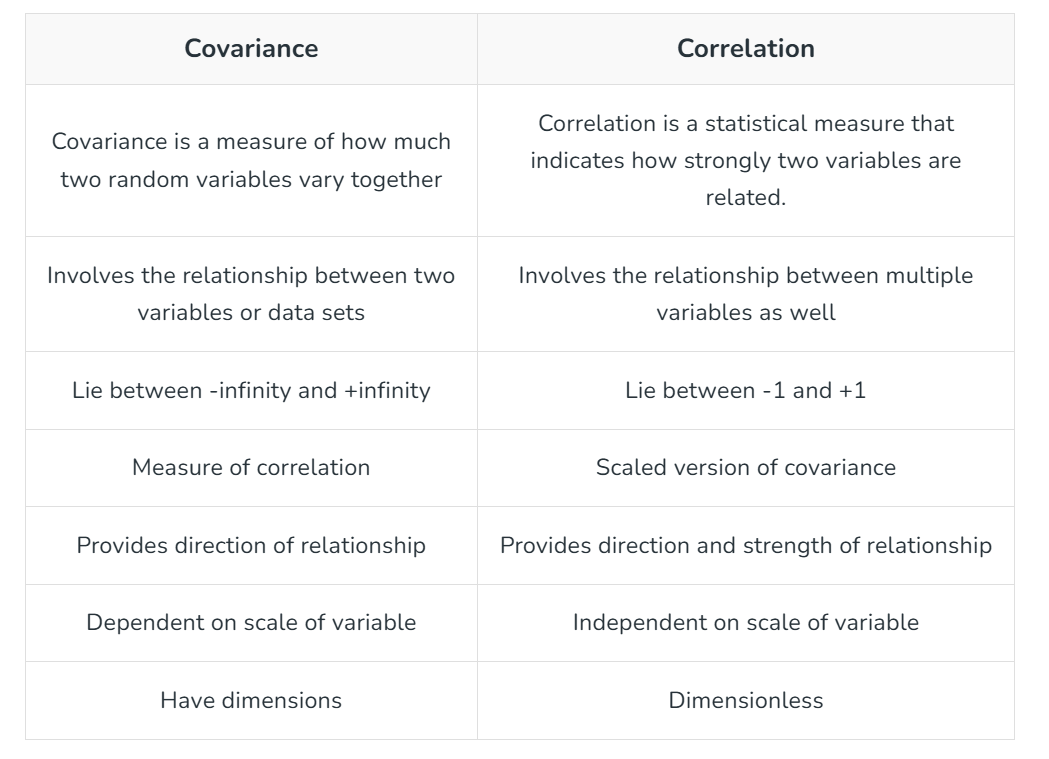

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.array([[3, 7],
                [-4, -6],
                [1, -1],
                [7,8],
                [-4, -1],
                [-3, -7]])


dataframe = pd.DataFrame(data, columns = ['feature1', 'feature2'])
dataframe

,feature1,feature2
0,3,7
1,-4,-6
2,1,-1
3,7,8
4,-4,-1
5,-3,-7


1. To make sure that our original data is in a standard normal form.
This is the below constraint of SNF

In [3]:

mean = 0
standard_deviation = 1

In [4]:
dataframe.describe()

,feature1,feature2
count,6.000000,6.000000
mean,0.000000,0.000000
std,4.472136,6.324555
min,-4.000000,-7.000000
25%,-3.750000,-4.750000
50%,-1.000000,-1.000000
75%,2.500000,5.000000
max,7.000000,8.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe = scaler.fit_transform(dataframe)

In [6]:
type(dataframe)

numpy.ndarray

In [7]:
dataframe = pd.DataFrame(data=dataframe, columns=  ['feature1', 'feature2'])
dataframe

,feature1,feature2
0,0.734847,1.212436
1,-0.979796,-1.039230
2,0.244949,-0.173205
3,1.714643,1.385641
4,-0.979796,-0.173205
5,-0.734847,-1.212436


In [8]:
dataframe.describe()

,feature1,feature2
count,6.000000e+00,6.000000
mean,1.850372e-17,0.000000
std,1.095445e+00,1.095445
min,-9.797959e-01,-1.212436
25%,-9.185587e-01,-0.822724
50%,-2.449490e-01,-0.173205
75%,6.123724e-01,0.866025
max,1.714643e+00,1.385641


2. Covariance matrix between the above two features (feature1 and feature2)

In [9]:
covariance_matrix = dataframe.T @ dataframe / 5
covariance_matrix

,feature1,feature2
feature1,1.20000,1.06066
feature2,1.06066,1.20000


In [10]:
covariance_matrix = np.cov(dataframe.feature1, dataframe.feature2)
covariance_matrix

array([[1.2       , 1.06066017],
       [1.06066017, 1.2       ]])

3. Try to evaluate the eigen values and eigen vectors using covariance matrix

In [11]:
eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)

print(eigenValues)
print(eigenVectors)

[2.26066017 0.13933983]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


4. To evaluate the new features extracted (Principal Components)

In [12]:
PC1 = dataframe @ eigenVectors[:, 0]
PC1

,0
0,1.376937
1,-1.427667
2,0.050731
3,2.192231
4,-0.815295
5,-1.376937


In [13]:
PC2 = dataframe @ eigenVectors[:, 1]
PC2

,0
0,0.337706
1,-0.042027
2,-0.295680
3,-0.232640
4,0.570346
5,-0.337706


How can we write the code in the industries to implement PCA

In [14]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)


X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# Standard Normal Form
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [18]:
X_pca

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [19]:
evr = pca.explained_variance_ratio_

In [20]:
evr

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])